# ANALYSIS OF REDDIT POSTS ABOUT CRYPTO MARKET AROUND FTX SCANDAL


## Name : Akhila Sakiramolla (asakiram@iu.edu)
## UID : 2000886005

## Importing required libraries

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 34.3 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 


In [2]:
import praw
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings("ignore")

## Acessing the reddit api

In [3]:
reddit = praw.Reddit(client_id="_HgEtQpNhPDoStaUzzqMSw",      # your client id
                     client_secret="WJffHTKMQ17d4TC8mw3XKEy1QahMBg",  #your client secret
                     user_agent="my user agent", #user agent name
                     username = "skittypoppop76",     # your reddit username
                     password = "H%6y6^5@7(7TfLs")     # your reddit password

In [4]:
sub = ['Cryptocurrency']  # make a list of subreddits you want to scrape the data from
for s in sub:
  subreddit = reddit.subreddit(s)   # Chosing the subreddit

## Querying data for keyword = SBF

In [5]:
query = ['SBF']

for item in query:
  post_dict = {
      "title" : [],   #title of the post
      "score" : [],   # score of the post
      "id" : [],      # unique id of the post
      "comms_num": [],   #the number of comments on the post
      "created" : [],  #timestamp of the post
      "body" : []         # the descriptionof post
  }
  comments_dict = {
      "comment_id" : [],      #unique comm id
      "comment_parent_id" : [],   # comment parent id
      "comment_body" : [],   # text in comment
      "comment_link_id" : []  #link to the comment
  }
  for submission in subreddit.search(query,sort = "top",limit = 20):
      post_dict["title"].append(submission.title)
      post_dict["score"].append(submission.score)
      post_dict["id"].append(submission.id)
      post_dict["comms_num"].append(submission.num_comments)
      post_dict["created"].append(submission.created)
      post_dict["body"].append(submission.selftext)
      
      ##### Acessing comments on the post
      submission.comments.replace_more(limit = 1)
      for comment in submission.comments.list():
          comments_dict["comment_id"].append(comment.id)
          comments_dict["comment_parent_id"].append(comment.parent_id)
          comments_dict["comment_body"].append(comment.body)
          comments_dict["comment_link_id"].append(comment.link_id)
  
  post_comments = pd.DataFrame(comments_dict)
  post_data = pd.DataFrame(post_dict)
  # post_comments.to_csv(s+"_comments_"+ item +"subreddit.csv")
  # post_data.to_csv(s+"_"+ item +"subreddit.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [6]:
post_data_sbf = post_data[['id', 'created', 'body']]
post_data_sbf['created'] = pd.to_datetime(post_data_sbf['created'], unit='s')
post_data_sbf.head()

,id,created,body
0,yxq8s2,2022-11-17 13:27:43,[https://twitter.com/kadhim/status/15932225953...
1,zb6szs,2022-12-03 03:47:20,
2,yuorb4,2022-11-14 04:25:57,FTX is the biggest collapse of a corporation s...
3,uvzw4f,2022-05-23 13:11:57,FatMan is a popular account on the Lunatic com...
4,yxkat4,2022-11-17 07:58:17,A Tornado cash developer is still in jail with...


In [7]:
post_comments['comment_parent_id'] = post_comments['comment_parent_id'].str[3:]
post_comments_sbf = pd.merge(post_comments, post_data_sbf[['id', 'created']], how='left', left_on='comment_parent_id', right_on='id')
post_comments_sbf.drop(['comment_id', 'comment_link_id', 'comment_parent_id'], axis=1, inplace = True)
post_comments_sbf.rename({'comment_body':'body'}, axis=1, inplace = True)
post_comments_sbf.head()

,body,id,created
0,> Never in my career have I seen such a comple...,yxq8s2,2022-11-17 13:27:43
1,Headquartering a major fintech in the Bahamas...,yxq8s2,2022-11-17 13:27:43
2,All this information might be shocking but it ...,yxq8s2,2022-11-17 13:27:43
3,Don’t worry folks. He said sorry and that he w...,yxq8s2,2022-11-17 13:27:43
4,This is actually incredible. FTX loans Alameda...,yxq8s2,2022-11-17 13:27:43


In [8]:
df_sbf1 = pd.concat([post_data_sbf, post_comments_sbf])
df_sbf = df_sbf1[df_sbf1['body'] != '[removed]']
df_sbf.shape

(9727, 3)

In [9]:
df_sbf.head()

,id,created,body
0,yxq8s2,2022-11-17 13:27:43,[https://twitter.com/kadhim/status/15932225953...
1,zb6szs,2022-12-03 03:47:20,
2,yuorb4,2022-11-14 04:25:57,FTX is the biggest collapse of a corporation s...
3,uvzw4f,2022-05-23 13:11:57,FatMan is a popular account on the Lunatic com...
4,yxkat4,2022-11-17 07:58:17,A Tornado cash developer is still in jail with...


## Querying data for keyword = FTX

In [10]:
query = ['FTX']

for item in query:
  post_dict = {
      "title" : [],   #title of the post
      "score" : [],   # score of the post
      "id" : [],      # unique id of the post
      "comms_num": [],   #the number of comments on the post
      "created" : [],  #timestamp of the post
      "body" : []         # the descriptionof post
  }
  comments_dict = {
      "comment_id" : [],      #unique comm id
      "comment_parent_id" : [],   # comment parent id
      "comment_body" : [],   # text in comment
      "comment_link_id" : []  #link to the comment
  }
  for submission in subreddit.search(query,sort = "top",limit = 20):
      post_dict["title"].append(submission.title)
      post_dict["score"].append(submission.score)
      post_dict["id"].append(submission.id)
      post_dict["comms_num"].append(submission.num_comments)
      post_dict["created"].append(submission.created)
      post_dict["body"].append(submission.selftext)
      
      ##### Acessing comments on the post
      submission.comments.replace_more(limit = 1)
      for comment in submission.comments.list():
          comments_dict["comment_id"].append(comment.id)
          comments_dict["comment_parent_id"].append(comment.parent_id)
          comments_dict["comment_body"].append(comment.body)
          comments_dict["comment_link_id"].append(comment.link_id)
  
  post_comments = pd.DataFrame(comments_dict)
  post_data = pd.DataFrame(post_dict)
  # post_comments.to_csv(s+"_comments_"+ item +"subreddit.csv")
  # post_data.to_csv(s+"_"+ item +"subreddit.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [11]:
post_data_ftx = post_data[['id', 'created', 'body']]
post_data_ftx['created'] = pd.to_datetime(post_data_ftx['created'], unit='s')
post_data_ftx.head()

,id,created,body
0,lg1yhv,2021-02-09 12:03:25,I tried summing up the top 50 coins in 1 or 2 ...
1,ytn3lg,2022-11-13 00:32:11,
2,zbtuvz,2022-12-03 23:16:56,
3,moilxv,2021-04-11 02:37:48,As the title says I'm into crypto pretty deep....
4,yxq8s2,2022-11-17 13:27:43,[https://twitter.com/kadhim/status/15932225953...


In [12]:
post_comments['comment_parent_id'] = post_comments['comment_parent_id'].str[3:]
post_comments_ftx = pd.merge(post_comments, post_data_ftx[['id', 'created']], how='left', left_on='comment_parent_id', right_on='id')
post_comments_ftx.drop(['comment_id', 'comment_link_id', 'comment_parent_id'], axis=1, inplace = True)
post_comments_ftx.rename({'comment_body':'body'}, axis=1, inplace = True)
post_comments_ftx.head()

,body,id,created
0,I know some folks are giving you issue to edit...,lg1yhv,2021-02-09 12:03:25
1,[deleted],lg1yhv,2021-02-09 12:03:25
2,[deleted],lg1yhv,2021-02-09 12:03:25
3,"I like Stellar, but damned if the ""stablecoin""...",lg1yhv,2021-02-09 12:03:25
4,> **TRON (TRX):** have you seen Silicon Valle...,lg1yhv,2021-02-09 12:03:25


In [13]:
df_ftx1 = pd.concat([post_data_ftx, post_comments_ftx])
df_ftx = df_ftx1[df_ftx1['body'] != '[removed]']
df_ftx.shape

(10763, 3)

In [14]:
df_ftx.head()

,id,created,body
0,lg1yhv,2021-02-09 12:03:25,I tried summing up the top 50 coins in 1 or 2 ...
1,ytn3lg,2022-11-13 00:32:11,
2,zbtuvz,2022-12-03 23:16:56,
3,moilxv,2021-04-11 02:37:48,As the title says I'm into crypto pretty deep....
4,yxq8s2,2022-11-17 13:27:43,[https://twitter.com/kadhim/status/15932225953...


## Merging the two datasets

In [15]:
df_final1 = pd.concat([df_sbf, df_ftx])
df_final1 = df_final1[df_final1['body'] != '']
df_final1.reset_index(drop = True, inplace = True)
df_final1.shape

(20476, 3)

In [16]:
df_final1['created'].min(), df_final1['created'].max()

(Timestamp('2021-02-09 12:03:25'), Timestamp('2022-12-07 22:23:19'))

In [17]:
df_final = df_final1[df_final1['created'] >= '2022-11-01']
df_final['created'].min(), df_final['created'].max()
df_final.shape

(6712, 3)

In [18]:
df_final

,id,created,body
0,yxq8s2,2022-11-17 13:27:43,[https://twitter.com/kadhim/status/15932225953...
1,yuorb4,2022-11-14 04:25:57,FTX is the biggest collapse of a corporation s...
3,yxkat4,2022-11-17 07:58:17,A Tornado cash developer is still in jail with...
4,yrvdes,2022-11-10 23:40:00,As most of you are already aware the current ...
5,z0w281,2022-11-21 10:55:43,FTX official Twitter released an update yester...
...,...,...,...
20268,z92lir,2022-11-30 20:42:13,Dudes gonna go down as the greatest scammer to...
20269,z92lir,2022-11-30 20:42:13,All those politicians who got donations are st...
20270,z92lir,2022-11-30 20:42:13,Yet the mainstream media is surprisingly suppr...
20271,z92lir,2022-11-30 20:42:13,will crypto die?


## Data preprocessing

In [19]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df_final['body'] = df_final['body'].apply(lambda x:clean_text(x))

In [20]:
df_final

,id,created,body
0,yxq8s2,2022-11-17 13:27:43,here is the twitter threaddirect link to the d...
1,yuorb4,2022-11-14 04:25:57,ftx is the biggest collapse of a corporation s...
3,yxkat4,2022-11-17 07:58:17,a tornado cash developer is still in jail with...
4,yrvdes,2022-11-10 23:40:00,as most of you are already aware the current ...
5,z0w281,2022-11-21 10:55:43,ftx official twitter released an update yester...
...,...,...,...
20268,z92lir,2022-11-30 20:42:13,dudes gonna go down as the greatest scammer to...
20269,z92lir,2022-11-30 20:42:13,all those politicians who got donations are st...
20270,z92lir,2022-11-30 20:42:13,yet the mainstream media is surprisingly suppr...
20271,z92lir,2022-11-30 20:42:13,will crypto die


In [21]:
df_final.isnull().sum()

id         0
created    0
body       0
dtype: int64

In [22]:
df_final.shape

(6712, 3)

In [23]:
df_final.to_csv('reddit_comment_data.csv')

## Sentiment analysis

In [24]:
from textblob import TextBlob

In [25]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [26]:
#Create two new columns
df_final['Subjectivity'] = df_final['body'].apply(subjectivity)
df_final['Polarity'] = df_final['body'].apply(polarity)

In [27]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_final['Sentiment'] = df_final['Polarity'].apply(getAnalysis)

df_final['Sentiment'].value_counts()

Positive    2473
Neutral     2368
Negative    1871
Name: Sentiment, dtype: int64

In [28]:
df_final.head()

,id,created,body,Subjectivity,Polarity,Sentiment
0,yxq8s2,2022-11-17 13:27:43,here is the twitter threaddirect link to the d...,0.486250,-0.055312,Negative
1,yuorb4,2022-11-14 04:25:57,ftx is the biggest collapse of a corporation s...,0.112500,0.000000,Neutral
3,yxkat4,2022-11-17 07:58:17,a tornado cash developer is still in jail with...,0.492560,0.271726,Positive
4,yrvdes,2022-11-10 23:40:00,as most of you are already aware the current ...,0.578321,-0.042231,Negative
5,z0w281,2022-11-21 10:55:43,ftx official twitter released an update yester...,0.414802,0.020992,Positive


In [29]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

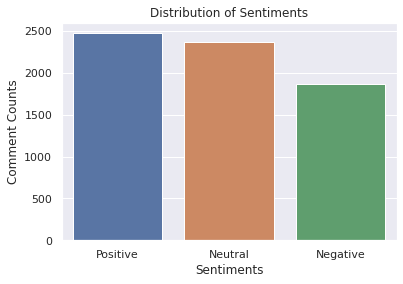

In [30]:
sns.set(style='darkgrid')
sns.countplot(x = 'Sentiment',
              data = df_final,
              order = df_final['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Comment Counts')
plt.show()


In [31]:
# plot the polarity and subjectivity
fig = px.scatter(df_final, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Sentiment',
                 size='Subjectivity')

#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()


In [32]:
df_final.head()

,id,created,body,Subjectivity,Polarity,Sentiment
0,yxq8s2,2022-11-17 13:27:43,here is the twitter threaddirect link to the d...,0.486250,-0.055312,Negative
1,yuorb4,2022-11-14 04:25:57,ftx is the biggest collapse of a corporation s...,0.112500,0.000000,Neutral
3,yxkat4,2022-11-17 07:58:17,a tornado cash developer is still in jail with...,0.492560,0.271726,Positive
4,yrvdes,2022-11-10 23:40:00,as most of you are already aware the current ...,0.578321,-0.042231,Negative
5,z0w281,2022-11-21 10:55:43,ftx official twitter released an update yester...,0.414802,0.020992,Positive


In [33]:
df_final['Week_Number'] = df_final['created'].dt.isocalendar().week
df_final.head()

,id,created,body,Subjectivity,Polarity,Sentiment,Week_Number
0,yxq8s2,2022-11-17 13:27:43,here is the twitter threaddirect link to the d...,0.486250,-0.055312,Negative,46
1,yuorb4,2022-11-14 04:25:57,ftx is the biggest collapse of a corporation s...,0.112500,0.000000,Neutral,46
3,yxkat4,2022-11-17 07:58:17,a tornado cash developer is still in jail with...,0.492560,0.271726,Positive,46
4,yrvdes,2022-11-10 23:40:00,as most of you are already aware the current ...,0.578321,-0.042231,Negative,45
5,z0w281,2022-11-21 10:55:43,ftx official twitter released an update yester...,0.414802,0.020992,Positive,47


In [34]:
df_final['Week_Number'].unique()

<IntegerArray>
[46, 45, 47, 48, 44, 49]
Length: 6, dtype: UInt32

In [35]:
for i in df_final['Week_Number'].unique():
  print("Week :", i)
  print(df_final[df_final['Week_Number'] == i]['created'].min(), df_final[df_final['Week_Number'] == i]['created'].max())

Week : 46
2022-11-14 04:25:57 2022-11-20 17:48:30
Week : 45
2022-11-08 22:55:53 2022-11-13 13:54:22
Week : 47
2022-11-21 10:55:43 2022-11-24 12:33:27
Week : 48
2022-11-28 03:37:36 2022-12-04 20:26:20
Week : 44
2022-11-06 23:40:40 2022-11-06 23:40:40
Week : 49
2022-12-05 13:18:50 2022-12-07 22:23:19


In [36]:
df_final['Week_Number'].value_counts()

45    2063
46    2046
48    1357
47     650
49     371
44     225
Name: Week_Number, dtype: Int64

In [37]:
df_final['Week_Number'] = np.where(df_final['Week_Number'] == 44, '11/01 - 11/07', df_final['Week_Number'])
df_final['Week_Number'] = np.where(df_final['Week_Number'] == 45, '11/08 - 11/13', df_final['Week_Number'])
df_final['Week_Number'] = np.where(df_final['Week_Number'] == 46, '11/14 - 11/20', df_final['Week_Number'])
df_final['Week_Number'] = np.where(df_final['Week_Number'] == 47, '11/21 - 11/27', df_final['Week_Number'])
df_final['Week_Number'] = np.where(df_final['Week_Number'] == 48, '11/28 - 12/04', df_final['Week_Number'])
df_final['Week_Number'] = np.where(df_final['Week_Number'] == 49, '12/05 - 12/07', df_final['Week_Number'])
df_final['Week_Number'].value_counts()

11/08 - 11/13    2063
11/14 - 11/20    2046
11/28 - 12/04    1357
11/21 - 11/27     650
12/05 - 12/07     371
11/01 - 11/07     225
Name: Week_Number, dtype: int64

In [38]:
weekly_sent = df_final.groupby(['Sentiment', 'Week_Number']).agg({'created':'count'})
weekly_sent.reset_index(inplace=True)
weekly_sent.head()

fig = px.line(weekly_sent, x="Week_Number", y="created",
             color='Sentiment')
fig = fig.update_layout(title='Number of posts per week based on sentiment')
fig.show()


In [39]:
weekly_sent1 = df_final.groupby(['Sentiment', 'Week_Number']).agg({'Polarity':'mean'})
weekly_sent1.reset_index(inplace=True)
weekly_sent1.head()

fig = px.line(weekly_sent1, x="Week_Number", y="Polarity",
             color='Sentiment')
fig = fig.update_layout(title='Average polarity of posts per week based on sentiment')
fig.show()

## Topic modelling

### Negative sentiment LDA

In [40]:
neg_data = df_final[df_final['Sentiment'] == 'Negative']
neg_data.shape

(1871, 7)

#### Lemmatization

In [41]:
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
stopwords = stopwords.words("english")

In [43]:
data = neg_data["body"]
print(data[0][0:90])

here is the twitter threaddirect link to the declaration ill just copy paste whats in it s


In [44]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print(lemmatized_texts[0][0:90])

here twitter link declaration ill just copy paste s s very little sbf investigate course b


In [45]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [46]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['here', 'twitter', 'link', 'declaration', 'ill', 'just', 'copy', 'paste', 'very', 'little', 'sbf', 'investigate', 'course', 'bankruptcy', 'lend', 'billion', 'bankmanfrie', 'paper', 'bird', 'entity']


In [47]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

['here', 'twitter', 'link', 'declaration', 'ill', 'just', 'copy', 'paste', 'very', 'little', 'sbf', 'investigate', 'course', 'bankruptcy', 'lend', 'billion', 'bankmanfrie', 'paper', 'bird', 'entity']


In [48]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

#### LDA

In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [50]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 35.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=727ba9c5fa46284969899ca8dc032563faef11183543fda2fae96f762b60627c
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8da5a69e5171a702fcc04785545bb52a3478ca754a18aff3ac438f08bc44b339
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [51]:
#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



In [52]:
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.364966  0.216656       1        1  21.622451
8      0.100623  0.359774       2        1  13.853708
2     -0.290543 -0.212524       3        1  10.142422
6     -0.226181  0.300079       4        1   9.754322
4      0.154178 -0.339971       5        1   8.962957
7     -0.081481  0.128674       6        1   7.978430
5     -0.084141 -0.316814       7        1   7.856615
1     -0.360825  0.018973       8        1   7.558413
9      0.114934 -0.041083       9        1   6.613336
3      0.308470 -0.113764      10        1   5.657345, topic_info=        Term        Freq       Total Category  logprob  loglift
126      get  271.000000  271.000000  Default  30.0000  30.0000
56      just  286.000000  286.000000  Default  29.0000  29.0000
9        bad  137.000000  137.000000  Default  28.0000  28.0000
427     fuck  140.000000  140.000000  Default  27.0000  27.0000
41        go  201.000000  201.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
69       non    6.582288    7.369539  Topic10  -5.2864   2.7592
485     read   19.218204   23.001139  Topic10  -4.2149   2.6925
191  company   15.014361   40.586400  Topic10  -4.4618   1.8778
100      use   15.533998   49.433292  Topic10  -4.4277   1.7146
464     hard    7.460781   51.471412  Topic10  -5.1611   0.9408

[401 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
104       5  0.975019       about
170       6  0.901851      access
1         2  0.989010     account
779       5  0.939095  accounting
2620      2  0.959202         ach
...     ...       ...         ...
420       5  0.956879       wrong
420       9  0.036109       wrong
335       3  0.653007        year
335       4  0.334467        year
511       4  0.992682         yet

[438 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 3, 7, 5, 8, 6, 2, 10, 4])

### Positive sentiment LDA

In [53]:
pos_data = df_final[df_final['Sentiment'] == 'Positive']
pos_data.shape

(2473, 7)

In [54]:
pos_data.head()

,id,created,body,Subjectivity,Polarity,Sentiment,Week_Number
3,yxkat4,2022-11-17 07:58:17,a tornado cash developer is still in jail with...,0.492560,0.271726,Positive,11/14 - 11/20
5,z0w281,2022-11-21 10:55:43,ftx official twitter released an update yester...,0.414802,0.020992,Positive,11/21 - 11/27
8,z0acqz,2022-11-20 17:48:30,we all here exactly know how and why ftx colla...,0.477454,0.160962,Positive,11/14 - 11/20
10,yq1b7g,2022-11-08 22:55:53,this should go without saying but it needs to ...,0.495406,0.027203,Positive,11/08 - 11/13
11,yo6kxe,2022-11-06 23:40:40,from his a huge thank you to everyone who ha...,0.563989,0.077201,Positive,11/01 - 11/07


#### Lemmatization

In [55]:
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
stopwords = stopwords.words("english")

In [57]:
pos_data.head()

,id,created,body,Subjectivity,Polarity,Sentiment,Week_Number
3,yxkat4,2022-11-17 07:58:17,a tornado cash developer is still in jail with...,0.492560,0.271726,Positive,11/14 - 11/20
5,z0w281,2022-11-21 10:55:43,ftx official twitter released an update yester...,0.414802,0.020992,Positive,11/21 - 11/27
8,z0acqz,2022-11-20 17:48:30,we all here exactly know how and why ftx colla...,0.477454,0.160962,Positive,11/14 - 11/20
10,yq1b7g,2022-11-08 22:55:53,this should go without saying but it needs to ...,0.495406,0.027203,Positive,11/08 - 11/13
11,yo6kxe,2022-11-06 23:40:40,from his a huge thank you to everyone who ha...,0.563989,0.077201,Positive,11/01 - 11/07


In [58]:
data = pos_data["body"]
print(data[3][0:90])

a tornado cash developer is still in jail without formal chargessbf committed  fraud and i


In [59]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print(lemmatized_texts[0][0:90])

tornado cash developer still jail formal chargessbf commit fraud play video game bahama lo


In [60]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [61]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['tornado', 'cash', 'developer', 'still', 'jail', 'formal', 'chargessbf', 'commit', 'fraud', 'play', 'video', 'game', 'bahama', 'lose', 'btwcode', 'free', 'sepeech', 'say', 'money', 'speak']


In [62]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

['tornado_cash', 'developer', 'still', 'jail', 'formal', 'chargessbf', 'commit', 'fraud', 'play', 'video', 'game', 'bahama', 'lose', 'btwcode', 'free', 'sepeech', 'say', 'money', 'speak', 'so']


In [63]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

#### LDA

In [64]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

In [65]:
# !pip install pyLDAvis

In [66]:
#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [67]:
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.181687 -0.361476       1        1  23.293121
1     -0.096881 -0.417457       2        1  22.465217
2     -0.390111 -0.043502       3        1   8.609240
0     -0.209753  0.336571       4        1   8.284607
7      0.294132 -0.105010       5        1   8.237347
6      0.366279  0.141026       6        1   8.065048
8      0.088592  0.347235       7        1   6.226300
5     -0.157873 -0.132607       8        1   5.640885
3     -0.184091  0.115467       9        1   4.607572
4      0.108019  0.119753      10        1   4.570662, topic_info=           Term        Freq       Total Category  logprob  loglift
300         get  388.000000  388.000000  Default  30.0000  30.0000
92         just  359.000000  359.000000  Default  29.0000  29.0000
269      crypto  318.000000  318.000000  Default  28.0000  28.0000
29        money  316.000000  316.000000  Default  27.0000  27.0000
169        good  296.000000  296.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
774    criminal    9.534164   10.321801  Topic10  -5.1114   3.0061
8     community    9.334696   10.122438  Topic10  -5.1325   3.0045
1893      clean    9.311565   10.099494  Topic10  -5.1350   3.0043
52        video    9.293386   10.081226  Topic10  -5.1370   3.0041
1199    history    9.818583   31.564168  Topic10  -5.0820   1.9178

[383 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
582       9  0.983052     able
952      10  0.968545    about
510      10  0.959813   access
227       2  0.984739  account
5009      5  0.965511      ach
...     ...       ...      ...
224       5  0.968573    write
930       7  0.986542    wrong
646       2  0.962977     year
646       4  0.029783     year
386       9  0.967352      yet

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 3, 1, 8, 7, 9, 6, 4, 5])

Reference - https://medium.com/swlh/scraping-reddit-using-python-57e61e322486
https://github.com/wjbmattingly/topic_modeling_textbook/blob/main/03_03_lda_model_demo_bigrams_trigrams.ipynb